Robert Vermeulen

Rpvermeu@calpoly.edu

Lab8

Import libraries and set up mysql connection

In [5]:
import mysql.connector
from mysql.connector import Error

import matplotlib
from matplotlib import pyplot as plt

import pygal
from pygal.style import Style
import pygal_maps_world as pa

pwdfileName = 'pss'
pwdfile = open("account.info.txt", 'r')
lines = pwdfile.readlines()
u = lines[0][:-1]
p = lines[1][:-1]


hostName = 'mysql.labthreesixfive.com'
portName = '3306'
userName = u
passString = p

dbName = 'LAB8'






Question 1:

Assuming the maxdeath is true for each event available (or the mindeath is true for events with a death flag but an unknown maxdeath),
visualize and compare the two following distributions:
1) Using data from all events globally, what proportion of all deaths resulted from each problem type?
2) Using data from all events that occured in the country with the most total deaths globally, what proportion of all deaths resulted from each problem type?

Connected to  mysql.labthreesixfive.com
Done


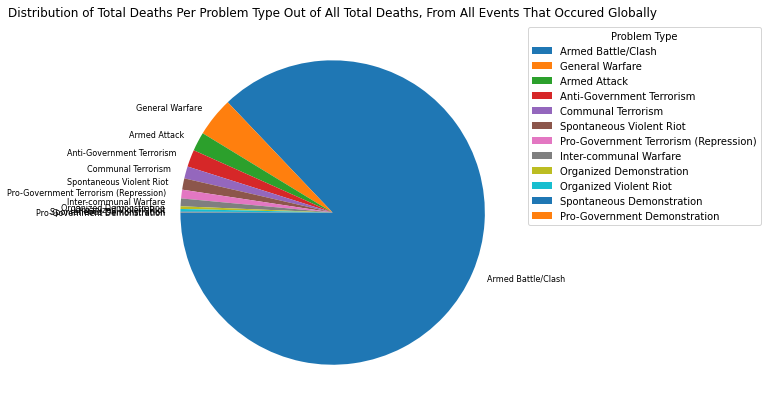

Rwanda


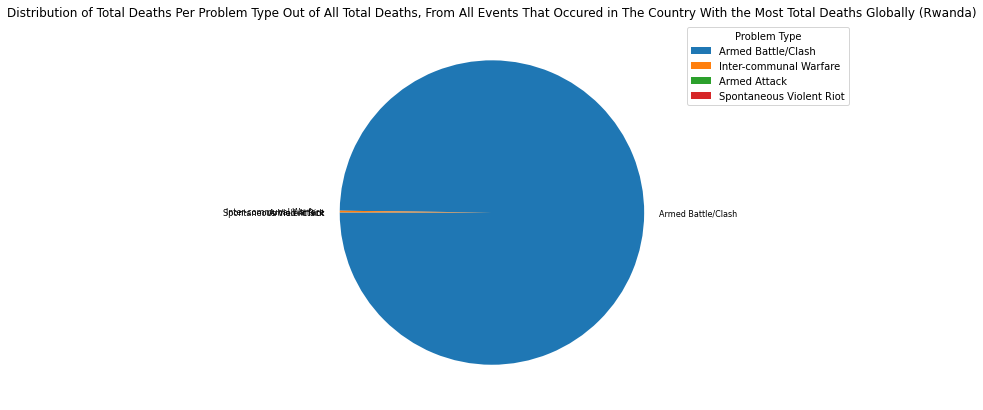

Rwanda


In [6]:
try:

    conn = mysql.connector.connect(host=hostName, port=portName, database=dbName,
                                   user=userName, password=passString)
    if conn.is_connected():
        print('Connected to ', hostName)

        cursor = conn.cursor()

        cursor.execute("WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "sumds AS ( SELECT Ptype, SUM(maxd) as deathTot \n"
                                        "FROM maxds \n"
                                        "GROUP BY Ptype ) \n"
                       "SELECT p.Ptype, p.ProblemType, s.deathTot \n"
                       "FROM ProblemTypes p, sumds s \n"
                       "WHERE p.Ptype = s.Ptype \n"
                       "ORDER BY s.deathTot DESC;")

        records = cursor.fetchall()
        pyth1 = records
        
        cursor.execute(
                       "WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype, City \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "conts AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                       "FROM Countries co, Cities ci, maxds m \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = m.City \n"
                                       "GROUP BY co.ISO3, co.Country ), \n"
                            "maxdeathc AS ( SELECT MAX(deathTot) as mdc\n"
                                           "FROM conts ), \n"
                            "maxc AS ( SELECT c.Country \n"
                                      "FROM conts c, maxdeathc m \n"
                                      "WHERE c.deathTot = m.mdc ), \n"
                            "sumds AS ( SELECT Ptype, SUM(maxd) as deathTot \n"
                                       "FROM maxds md, Countries co, Cities ci, maxc mc \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = md.City and \n"
                                             "co.Country = mc.Country \n"
                                        "GROUP BY Ptype ) \n"
                        "SELECT p.Ptype, p.ProblemType, s.deathTot \n"
                        "FROM ProblemTypes p, sumds s \n"
                        "WHERE p.Ptype = s.Ptype \n"
                        "ORDER BY s.deathTot DESC;")

        records = cursor.fetchall()
        pyth2 = records
        
        cursor.execute(
                       "WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype, City \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "conts AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                       "FROM Countries co, Cities ci, maxds m \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = m.City \n"
                                       "GROUP BY co.ISO3, co.Country ), \n"
                            "maxdeathc AS ( SELECT MAX(deathTot) as mdc\n"
                                           "FROM conts ), \n"
                            "maxc AS ( SELECT c.Country \n"
                                      "FROM conts c, maxdeathc m \n"
                                      "WHERE c.deathTot = m.mdc ) \n"
                        "SELECT * \n"
                        "FROM maxc;")

        records = cursor.fetchall()
        pyth3 = records
        
        
        #print("---------------------------------------")
        #for r in records:
        #   print(r)
        #print("---------------------------------------")


except Error as e:
    print('Connection error: ', e)

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print('Done')

###### now analyzing return from query for first pie graph
l = len(pyth1)
data  = []
for i in range(l):
    data.append(int(pyth1[i][2]))

labs = []
for i in range(l):
    labs.append(pyth1[i][1])

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, autotexts = ax.pie(data, labels = labs,                                  
                                 startangle = 180)
 
# Adding legend
ax.legend(wedges, labs,
          title ="Problem Type",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8)
ax.set_title("Distribution of Total Deaths Per Problem Type Out of All Total Deaths, From All Events That Occured Globally")
 
# show plot
plt.show()


############ finding country with highest death total
print(pyth3[0][0])

###### now analyzing return from query for second pie graph
l = len(pyth2)
data  = []
for i in range(l):
    data.append(int(pyth2[i][2]))

labs = []
for i in range(l):
    labs.append(pyth2[i][1])

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, autotexts = ax.pie(data, labels = labs,                                  
                                 startangle = 180)
 
# Adding legend
ax.legend(wedges, labs,
          title ="Problem Type",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
tittext = "Distribution of Total Deaths Per Problem Type Out of All Total Deaths,"
tittext += " From All Events That Occured in The Country With the Most Total Deaths Globally "
tittext += '(' + pyth3[0][0] + ')'
plt.setp(autotexts, size = 8)
ax.set_title(tittext)
 
# show plot
plt.show()

print(pyth3[0][0])






To collect the results, I first made a list of all events that had a death, and included their maxdeaths (or their mindeaths in the case that maxdeaths are unkown but the death flag is activated). I then grouped this list by problem type to find the sum of all deaths per problem type. I transferred this list into the first bar chart using pyplot from matplotlib.

For the second bar chart, I first had to find the country with the most total deaths. This turned out to be Rwanda. Once I had that, I made a list of all events in Rwanda that had a death, and included their maxdeaths as done before. I then grouped this list by problem type to find the sum of all deaths per problem type. I transferred this list into the second bar chart using pyplot from matplotlib.

After visualizing the two charts, It's clear that "Armed Battle/Clash" type events have alloted for a majority of the deaths both globally and in Rwanda. In Rwanda however, almost all total deaths are from these types of events vs globally where only about 5/6 of all total deaths are from these types of events. This makes me wonder how big of an impact "Armed Battle/Clash" events from Rwanda are effecting the global totals.

.
.
.
.
.

.
.
.
.
.

.
.
.
.
.

Question 2:

Assuming the maxdeath is true for each event available (or the mindeath is true for events with a death flag but an unknown maxdeath),
visualize and compare the following distribution:
1) Using data from all events globally except for Armed Battle/Clash type events in Rwanda, what proportion of all deaths resulted from each problem type?

Connected to  mysql.labthreesixfive.com
Done


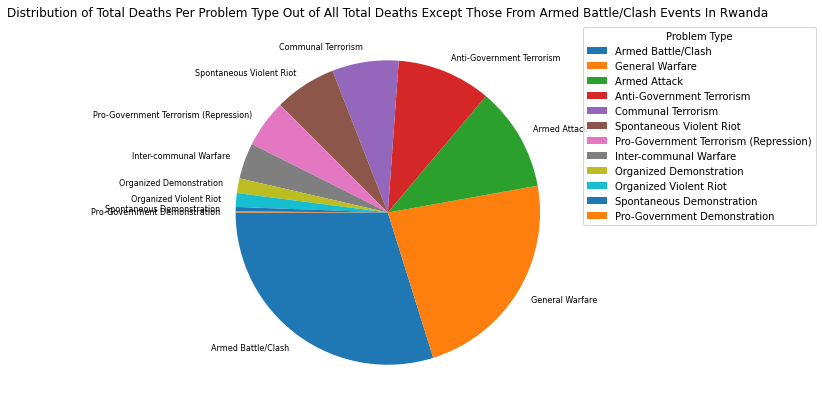

In [7]:
try:

    conn = mysql.connector.connect(host=hostName, port=portName, database=dbName,
                                   user=userName, password=passString)
    if conn.is_connected():
        print('Connected to ', hostName)

        cursor = conn.cursor()
        
        cursor.execute(
                       "WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype, City \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "conts AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                       "FROM Countries co, Cities ci, maxds m \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = m.City \n"
                                       "GROUP BY co.ISO3, co.Country ), \n"
                            "maxdeathc AS ( SELECT MAX(deathTot) as mdc\n"
                                           "FROM conts ), \n"
                            "maxc AS ( SELECT c.Country \n"
                                      "FROM conts c, maxdeathc m \n"
                                      "WHERE c.deathTot = m.mdc ), \n"
                            "sumds AS ( SELECT md.Ptype, SUM(maxd) as deathTot \n"
                                       "FROM maxds md, Countries co, Cities ci, maxc mc, ProblemTypes p \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = md.City and \n"
                                             "(co.Country != mc.Country or \n"
                                              "(md.Ptype = p.Ptype and \n"
                                               "p.ProblemType != 'Armed Battle/Clash'))"
                                        "GROUP BY Ptype ) \n"
                        "SELECT p.Ptype, p.ProblemType, s.deathTot \n"
                        "FROM ProblemTypes p, sumds s \n"
                        "WHERE p.Ptype = s.Ptype \n"
                        "ORDER BY s.deathTot DESC;")

        records = cursor.fetchall()
        pyth2 = records
        
        
        cursor.execute(
                       "WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype, City \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "conts AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                       "FROM Countries co, Cities ci, maxds m \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = m.City \n"
                                       "GROUP BY co.ISO3, co.Country ), \n"
                            "maxdeathc AS ( SELECT MAX(deathTot) as mdc\n"
                                           "FROM conts ), \n"
                            "maxc AS ( SELECT c.Country \n"
                                      "FROM conts c, maxdeathc m \n"
                                      "WHERE c.deathTot = m.mdc ), \n"
                            "sumds AS ( SELECT Ptype, SUM(maxd) as deathTot \n"
                                       "FROM maxds md, Countries co, Cities ci, maxc mc \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = md.City and \n"
                                             "co.Country = mc.Country \n"
                                        "GROUP BY Ptype ), \n"
                            "psums AS ( SELECT p.Ptype, p.ProblemType, s.deathTot \n"
                                       "FROM ProblemTypes p, sumds s \n"
                                       "WHERE p.Ptype = s.Ptype \n"
                                       "ORDER BY s.deathTot DESC ), \n"
                            "maxpsum AS ( SELECT MAX(deathTot) as mps \n"
                                         "FROM psums ), \n"
                            "maxpt AS ( SELECT p.ProblemType, p.deathTot \n"
                                       "FROM psums p, maxpsum m \n"
                                       "WHERE p.deathTot = m.mps ) \n"
                        "SELECT DISTINCT maxc.Country, maxpt.ProblemType, maxpt.deathTot \n"
                        "FROM maxc, maxpt ;")

        records = cursor.fetchall()
        pyth3 = records
        
        
        #print("---------------------------------------")
        #for r in records:
        #   print(r)
        #print("---------------------------------------")


except Error as e:
    print('Connection error: ', e)

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print('Done')


###### now analyzing return from query for second pie graph


l = len(pyth2)
data  = []
for i in range(l):
    data.append(int(pyth2[i][2]))

labs = []
for i in range(l):
    labs.append(pyth2[i][1])

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, autotexts = ax.pie(data, labels = labs,                                  
                                 startangle = 180)
 
# Adding legend
ax.legend(wedges, labs,
          title ="Problem Type",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
tittext = "Distribution of Total Deaths Per Problem Type Out of All Total Deaths Except Those From "
tittext += pyth3[0][1]
tittext += " Events In "
tittext += pyth3[0][0]
plt.setp(autotexts, size = 8)
ax.set_title(tittext)
 
# show plot
plt.show()


To collect the results I had to first the country with the most total deaths, which is Rwanda, and find the tuples for "Armed Battle/Clash" events in Rwanda.
I then made a list of all events globally except those in Rwanda that are type "Armed Battle/clash". I grouped this list by problem type to find the sum of all deaths per problem type. I then transferred this list into the second bar chart using pyplot from matplotlib.

Visualizing this new chart first shows us how big of a chunk of all global deaths in the database are from "Armed Battle/Clash" in Rwanda. It appears that these type of events make up slightly more than half of all deaths. As a subquestion below, I will investigate to see what proportion of these are from the Rwanda genocide of 1994 by seeing if they are all from one event. This new chart also gives us much better insight as to the difference in proportions between problem types besides "Armed Battle/Clash" (though this is still the problem type with the most deaths even while excluding the Rwanda genocide). We can now see that the proportion for "General Warfare" is about twice as large than that of "Armed Attack", the next biggest proportion.

In [8]:
######code to find all "Armed Battle/Clash" in Rwanda. Shows 5 events, two of which appear to be a part of the Rwanda genocide of 1994.

try:

    conn = mysql.connector.connect(host=hostName, port=portName, database=dbName,
                                   user=userName, password=passString)
    if conn.is_connected():
        print('Connected to ', hostName)

        cursor = conn.cursor()

        cursor.execute(
                       "WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype, City \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "conts AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                       "FROM Countries co, Cities ci, maxds m \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = m.City \n"
                                       "GROUP BY co.ISO3, co.Country ), \n"
                            "maxdeathc AS ( SELECT MAX(deathTot) as mdc\n"
                                           "FROM conts ), \n"
                            "maxc AS ( SELECT c.Country \n"
                                      "FROM conts c, maxdeathc m \n"
                                      "WHERE c.deathTot = m.mdc ), \n"
                            "sumds AS ( SELECT Ptype, SUM(maxd) as deathTot \n"
                                       "FROM maxds md, Countries co, Cities ci, maxc mc \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = md.City and \n"
                                             "co.Country = mc.Country \n"
                                        "GROUP BY Ptype ), \n"
                            "psums AS ( SELECT p.Ptype, p.ProblemType, s.deathTot \n"
                                       "FROM ProblemTypes p, sumds s \n"
                                       "WHERE p.Ptype = s.Ptype \n"
                                       "ORDER BY s.deathTot DESC ), \n"
                            "maxpsum AS ( SELECT MAX(deathTot) as mps \n"
                                         "FROM psums ), \n"
                            "maxpt AS ( SELECT p.Ptype, p.ProblemType, p.deathTot \n"
                                       "FROM psums p, maxpsum m \n"
                                       "WHERE p.deathTot = m.mps ) \n"
                        "SELECT mp.ProblemType, mc.Country, e.City, e.StartDate, \n"
                               "e.EndDate, e.minDeaths, e.maxDeaths \n"
                        "FROM Events e, Countries co, Cities ci, maxc mc, maxpt mp \n"
                        "WHERE co.ISO3 = ci.Country and \n"
                              "ci.CityId = e.City and \n"
                              "co.Country = mc.Country and \n"
                              "mp.Ptype = e.Ptype \n;")

        records = cursor.fetchall()
        pyth3 = records
        
        
        #print("---------------------------------------")
        #for r in records:
        #   print(r)
        #print("---------------------------------------")


except Error as e:
    print('Connection error: ', e)

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print('Done')


Connected to  mysql.labthreesixfive.com
Done


In [9]:
######code to test a theory. Found that these two events from The Rwanda genocide are the only events in database with a confirmed maxDeath of 10,000 or greater

try:

    conn = mysql.connector.connect(host=hostName, port=portName, database=dbName,
                                   user=userName, password=passString)
    if conn.is_connected():
        print('Connected to ', hostName)

        cursor = conn.cursor()

        cursor.execute("SELECT * \n"
                       "FROM Events \n"
                       "WHERE maxDeaths > 10000")

        records = cursor.fetchall()
        pyth3 = records
        
        
        #print("---------------------------------------")
        #for r in records:
        #   print(r)
        #print("---------------------------------------")


except Error as e:
    print('Connection error: ', e)

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print('Done')

Connected to  mysql.labthreesixfive.com
Done


.
.
.
.
.

.
.
.
.
.

.
.
.
.
.

Question 3:

Assuming the maxdeath is true for each event available (or the mindeath is true for events with a death flag but an unknown maxdeath),
for each problem type, find the average amount of deaths per each Urban Unrest event of this problem type with a confirmed death. 
Do not include events from the Rwanda Genocide of 1994 while calculating the ratio of the "Armed Battle/Clash" problem type 
Display this information on two different bar charts:
1) Include the ratio of deaths/event of the Rwanda Genocide of 1994, and compare to all problem types
2) Show only the ratios for each problem type.

Connected to  mysql.labthreesixfive.com
Done


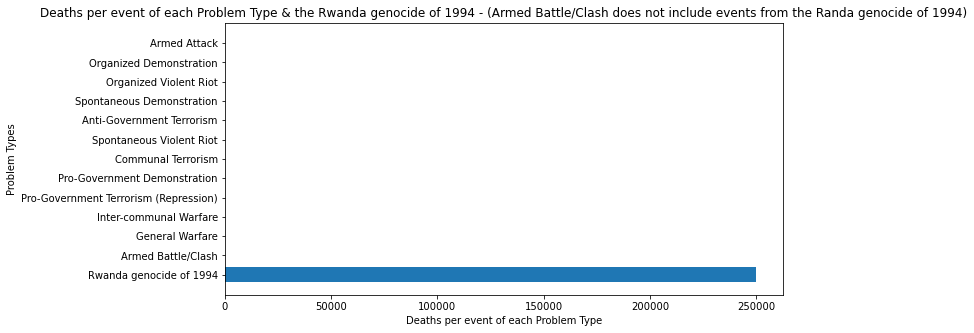

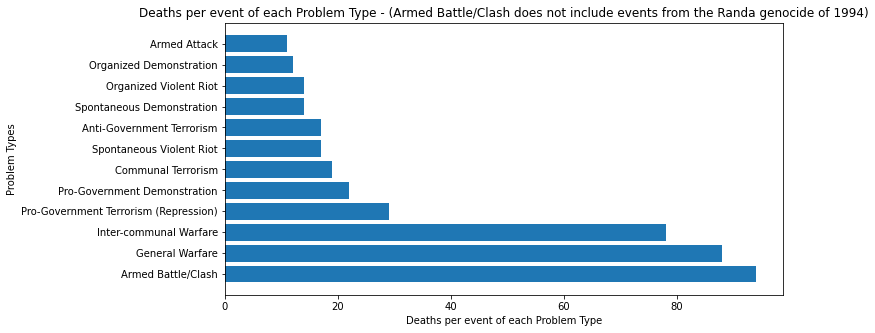

In [10]:
try:

    conn = mysql.connector.connect(host=hostName, port=portName, database=dbName,
                                   user=userName, password=passString)
    if conn.is_connected():
        print('Connected to ', hostName)

        cursor = conn.cursor()
        
        cursor.execute("(WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype, City \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "conts AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                       "FROM Countries co, Cities ci, maxds m \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = m.City \n"
                                       "GROUP BY co.ISO3, co.Country ), \n"
                            "maxdeathc AS ( SELECT MAX(deathTot) as mdc\n"
                                           "FROM conts ), \n"
                            "maxc AS ( SELECT c.Country \n"
                                      "FROM conts c, maxdeathc m \n"
                                      "WHERE c.deathTot = m.mdc ), \n"
                            "dperes AS ( SELECT md.Ptype, SUM(maxd)/COUNT(*) as dpere \n"
                                       "FROM maxds md, Countries co, Cities ci, maxc mc, ProblemTypes p \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = md.City and \n"
                                             "(co.Country != mc.Country or \n"
                                             "(md.Ptype = p.Ptype and \n"
                                              "p.ProblemType != 'Armed Battle/Clash')) \n"
                                        "GROUP BY md.Ptype )\n"
                        "SELECT p.ProblemType, d.dpere \n"
                        "FROM ProblemTypes p, dperes d \n"
                        "WHERE p.Ptype = d.Ptype \n"
                        "ORDER BY d.dpere DESC) \n"
                        "UNION \n"
                        "(WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype, City \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "conts AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                       "FROM Countries co, Cities ci, maxds m \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = m.City \n"
                                       "GROUP BY co.ISO3, co.Country ), \n"
                            "maxdeathc AS ( SELECT MAX(deathTot) as mdc\n"
                                           "FROM conts ), \n"
                            "maxc AS ( SELECT c.Country \n"
                                      "FROM conts c, maxdeathc m \n"
                                      "WHERE c.deathTot = m.mdc ), \n"
                            "dperes AS ( SELECT md.Ptype, SUM(md.maxd)/COUNT(*) as dpere \n"
                                       "FROM maxds md, Countries co, Cities ci, maxc mc, ProblemTypes p \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = md.City and \n"
                                             "co.Country = mc.Country and \n"
                                             "md.Ptype = p.Ptype and \n"
                                             "md.maxd > 10000 and \n"
                                             "p.ProblemType = 'Armed Battle/Clash' \n"
                                        "GROUP BY md.Ptype ) \n"
                        "SELECT p.ProblemType, d.dpere \n"
                        "FROM ProblemTypes p, dperes d \n"
                        "WHERE p.Ptype = d.Ptype) \n"
                        "ORDER BY dpere DESC ;")

        records = cursor.fetchall()
        pyth1 = records
        
        #print("---------------------------------------")
        #for r in records:
        #   print(r)
        #print("---------------------------------------")


except Error as e:
    print('Connection error: ', e)

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print('Done')
        
####################### now to process the query into a bar chart

l = len(pyth1)

newp = []
for i in range(l):
    newp.append([])
    newp[i].append(pyth1[i][0])
    newp[i].append(int(pyth1[i][1]))
    

newp[0][0] = 'Rwanda genocide of 1994'
    
ptypes = []
values = []
for i in range(l):
    ptypes.append(newp[i][0])
    values.append(newp[i][1])

 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(ptypes, width = values)
 
plt.xlabel("Deaths per event of each Problem Type")
plt.ylabel("Problem Types")
plt.title("Deaths per event of each Problem Type & the Rwanda genocide of 1994 - (Armed Battle/Clash does not include events from the Randa genocide of 1994)")
plt.show()


###################second bar graph
newp = []
for i in range(l):
    if i != 0:
        newp.append([])
        newp[i-1].append(pyth1[i][0])
        newp[i-1].append(int(pyth1[i][1]))
    
ptypes = []
values = []
for i in range(l-1):
    ptypes.append(newp[i][0])
    values.append(newp[i][1])

 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(ptypes, width = values)
 
plt.xlabel("Deaths per event of each Problem Type")
plt.ylabel("Problem Types")
plt.title("Deaths per event of each Problem Type - (Armed Battle/Clash does not include events from the Randa genocide of 1994)")
plt.show()














To collect this data I first used the previoud list of the maximum possible deaths for each event, and grouped it into each problem type to find the sum amount of deaths, as well as the count of the amount of events. I then compared these two values to find the ratio for each problem type. I then used SQL's "UNION" syntax to join that list with another. This second list found all events that were a part of the Rwanda genocide of 1994, and found the ratio of deaths per event for only these events. I then put this unioned list into the first bar graph using pyplot from matplotlib. I then used the first list (before the union with the ratio for each problem type only) to create the second bar graph using pyplot from matplotlib.

The first bar graph shows us two things. First is that the Rwanda genocide of 1994 is only a few different events, each with an incredibly high death count, instead of a lot of events with a large death count. Second is just how much more deadly this genocide was than any other Urban Unrest events. The Problem Type with the highest deaths per event ratio is Armed Battle/Clash (not including the Rwanda genocide), but the ratio for the Rwanda genocide is over 2,500 times the ratio for all other Armed Battle/Clash events.

The second bar graph gives us insights on the differences in ratios between each problem type. In conjunction with the pie chart from question two, we can analyze if a problem type has plenty events with low deaths, or a few events with high deaths. Armed Attack was the 3rd highest death total in the pie chart, but has the lowest ratio of deaths per event out of any problem type. This shows us that there's a large number of different armed attacks in the database, but each one has reletively low casualties.

.
.
.
.
.

.
.
.
.
.

.
.
.
.
.

Question 4:

Assuming the maxdeath is true for each event available (or the mindeath is true for events with a death flag but an unknown maxdeath).
Find the total amount of deaths that have occured from Urban Unrest events in Rwanda, and using a bar chart,
compare it to the total amount of deaths that have occured from Urban Unrest events in every country besides Rwanda.

Connected to  mysql.labthreesixfive.com
Done


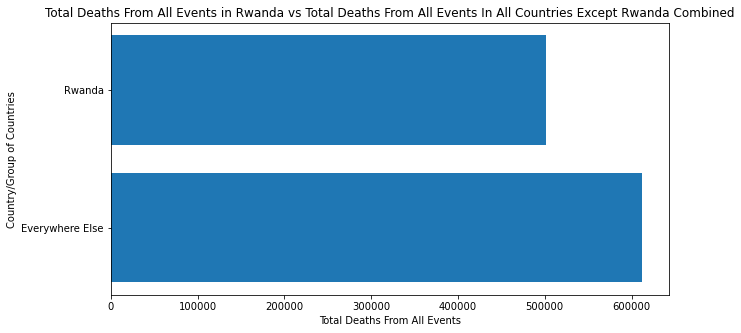

In [11]:
try:

    conn = mysql.connector.connect(host=hostName, port=portName, database=dbName,
                                   user=userName, password=passString)
    if conn.is_connected():
        print('Connected to ', hostName)

        cursor = conn.cursor()
        
        cursor.execute("WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype, City \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "conts AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                       "FROM Countries co, Cities ci, maxds m \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = m.City \n"
                                       "GROUP BY co.ISO3, co.Country ), \n"
                            "maxdeathc AS ( SELECT MAX(deathTot) as mdc\n"
                                           "FROM conts ), \n"
                            "maxc AS ( SELECT c.Country, c.deathTot \n"
                                      "FROM conts c, maxdeathc m \n"
                                      "WHERE c.deathTot = m.mdc ), \n"
                            "tot AS ( SELECT 'Everywhere Else' as Country, SUM(deathTot) as deathTot \n"
                                     "FROM conts ) \n"
                        "(SELECT * FROM tot) \n"
                        "UNION \n"
                        "(Select * FROM maxc);")

        records = cursor.fetchall()
        pyth1 = records
        
        #print("---------------------------------------")
        #for r in records:
        #   print(r)
        #print("---------------------------------------")


except Error as e:
    print('Connection error: ', e)

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print('Done')

####################### now to process the query into a bar graph

l = len(pyth1)

newp = []
for i in range(l):
    newp.append([])
    newp[i].append(pyth1[i][0])
    newp[i].append(int(pyth1[i][1]))
    
    
ptypes = []
values = []
for i in range(l):
    ptypes.append(newp[i][0])
    values.append(newp[i][1])

 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(ptypes, width = values)
 
plt.xlabel("Total Deaths From All Events")
plt.ylabel("Country/Group of Countries")
plt.title("Total Deaths From All Events in Rwanda vs Total Deaths From All Events In All Countries Except Rwanda Combined")
plt.show()
        


To collect this data, I had two find two different totals, with similar queries. The first found the total deaths (using the previoud maximum deaths possible list) of all events that have occured in Rwanda. The second finds the total deaths from all events that occured in countries that are not rwanda. I then used SQL's UNION syntax to combine these results into a single query. I then took the outputted totals and turned them into a bar graph using pyplot from matplotlib.

The results of this query really hits the nail on the head of just how brutal the Rwanda genocide of 1994 is. With just 5 events, the death total in Rwanda is almost as big as the death total of every other country combined. This chart shows us really just how large of a proportion of the total deaths in the database were from the Rwanda Genocide of 1994.

.
.
.
.
.

.
.
.
.
.

.
.
.
.
.

Question 5:

The Rwanda Genocide of 1994 occured in the capital of Rwanda, Kigali. Let's investigate whether or not countries have had more deaths in their capital city, or outside of their capital city. 
Assuming the maxdeath is true for each event available (or the mindeath is true for events with a death flag but an unknown maxdeath),
for each country, analyize all Urban Unrest Events in the country and compare the amount of deaths that occured in the capital city vs the amount of deaths total.
Show this data visually through a world map where a country is red if a majority of it's deaths occured in the capital, blue if the majority of deaths were outside of the capital city, and green if there are no deaths found in the database for that country.

In [12]:
try:

    conn = mysql.connector.connect(host=hostName, port=portName, database=dbName,
                                   user=userName, password=passString)
    if conn.is_connected():
        print('Connected to ', hostName)

        cursor = conn.cursor()

        cursor.execute("WITH \n"
                           "maxds AS ( SELECT CASE \n"
                                              "WHEN maxDeaths = -1 THEN minDeaths \n"
                                              "WHEN maxDeaths > -1 THEN maxDeaths \n"
                                            "END as maxd, Ptype, City \n"
                                    "FROM Events \n"
                                    "WHERE deathFlag = 1 ), \n"
                            "contstot AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                       "FROM Countries co, Cities ci, maxds m \n"
                                       "WHERE co.ISO3 = ci.Country and \n"
                                             "ci.CityId = m.City \n"
                                       "GROUP BY co.ISO3, co.Country ), \n"
                            "contscapstot AS ( SELECT co.Country, SUM(m.maxd) as deathTot \n"
                                              "FROM Countries co, Cities ci, maxds m \n"
                                              "WHERE co.ISO3 = ci.Country and \n"
                                                    "ci.CityId = m.City and \n"
                                                    "ci.isCapital = 1 \n"
                                              "GROUP BY co.ISO3, co.Country ), \n" 
                            "contratios AS ( SELECT ct.Country, cct.deathTot/ct.deathTot * 100 AS ratio \n"
                                            "FROM contstot ct LEFT JOIN contscapstot cct ON ct.Country = cct.Country \n"
                                            "ORDER BY ratio DESC ) \n "
                        "SELECT c.Country, CASE \n"
                                               "WHEN c.ratio > 50 THEN 1 \n"
                                               "WHEN c.ratio <= 50 THEN 0 \n"
                                               "WHEN c.ratio is null THEN 0 \n"
                                           "END as 'MajorityInCapital?' \n"
                        "FROM contratios c;" )

        records = cursor.fetchall()
        pyth1 = records
        
        #print("---------------------------------------")
        #for r in records:
        #    print(r)
        #print("---------------------------------------")


except Error as e:
    print('Connection error: ', e)

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print('Done')
        
        
######################### to turn into map

contList = ['Andorra','United Arab Emirates','Afghanistan','Albania','Armenia','Angola','Antarctica','Argentina','Austria','Australia','Azerbaijan',
            'Bosnia and Herzegovina','Bangladesh','Belgium','Burkina Faso','Bulgaria','Bahrain','Burundi','Benin','Brunei Darussalam','Bolivia',
            'Brazil','Bhutan','Botswana','Belarus','Belize','Canada','Congo, DRC','Central African Republic','Congo','Switzerland',
            "Cote d'Ivoire",'Chile','Cameroon','China','Colombia','Costa Rica','Cuba','Cape Verde','Cyprus','Czech Republic','Germany','Djibouti','Denmark',
            'Dominican Republic','Algeria','Ecuador','Estonia','Egypt','Western Sahara','Eritrea','Spain','Ethiopia','Finland','France','Gabon','United Kingdom','Georgia',
            'French Guiana','Ghana','Greenland','Gambia','Guinea','Equatorial Guinea','Greece','Guatemala','Guam','Guinea-Bissau','Guyana','Hong Kong','Honduras','Croatia',
            'Haiti','Hungary','Indonesia','Ireland','Israel','India','Iraq','Iran','Iceland','Italy','Jamaica','Jordan','Japan','Kenya','Kyrgyzstan',
            'Cambodia','Korea, Democratic People’s Republic of','South Korea','Kuwait','Kazakhstan','Laos','Lebanon','Liechtenstein',
            'Sri Lanka','Liberia','Lesotho','Lithuania','Luxembourg','Latvia','Libya','Morocco','Monaco','Moldova, Republic of','Montenegro','Madagascar',
            'Macedonia, the former Yugoslav Republic of','Mali','Myanmar','Mongolia','Macao','Mauritania','Malta','Mauritius','Maldives','Malawi','Mexico','Malaysia',
            'Mozambique','Namibia','Niger','Nigeria','Nicaragua','Netherlands','Norway','Nepal','New Zealand','Oman','Panama','Peru','Papua New Guinea','Philippines',
            'Pakistan','Poland','Puerto Rico','Palestine, State of','Portugal','Paraguay','Reunion','Romania','Serbia','Russian Federation','Rwanda','Saudi Arabia',
            'Seychelles','Sudan','Sweden','Singapore','Saint Helena, Ascension and Tristan da Cunha','Slovenia','Slovakia','Sierra Leone','San Marino','Senegal','Somalia',
            'Suriname','Sao Tome and Principe','El Salvador','Syria','Swaziland','Chad','Togo','Thailand','Tajikistan','Timor-Leste','Turkmenistan',
            'Tunisia','Turkey','Taiwan','Tanzania','Ukraine','Uganda','United States','Uruguay','Uzbekistan',
            'Holy See (Vatican City State)','Venezuela','Vietnam','Yemen','Mayotte','South Africa','Zambia','Zimbabwe']

abbrevList = ['ad','ae','af','al','am','ao','aq','ar','at','au','az','ba','bd','be','bf','bg','bh','bi','bj','bn','bo','br','bt','bw','by','bz','ca','cd','cf','cg',
              'ch','ci','cl','cm','cn','co','cr','cu','cv','cy','cz','de','dj','dk','do','dz','ec','ee','eg','eh','er','es','et','fi','fr','ga','gb','ge','gf','gh',
              'gl','gm','gn','gq','gr','gt','gu','gw','gy','hk','hn','hr','ht','hu','id','ie','il','in','iq','ir','is','it','jm','jo','jp','ke','kg','kh','kp','kr',
              'kw','kz','la','lb','li','lk','lr','ls','lt','lu','lv','ly','ma','mc','md','me','mg','mk','ml','mm','mn','mo','mr','mt','mu','mv','mw','mx','my','mz',
              'na','ne','ng','ni','nl','no','np','nz','om','pa','pe','pg','ph','pk','pl','pr','ps','pt','py','re','ro','rs','ru','rw','sa','sc','sd','se','sg','sh',
              'si','sk','sl','sm','sn','so','sr','st','sv','sy','sz','td','tg','th','tj','tl','tm','tn','tr','tw','tz','ua','ug','us','uy','uz','va','ve','vn','ye',
              'yt','za','zm','zw']

cones = []
ceros = []

for i in pyth1:
    if i[1] == 1:
        cones.append(i[0])
    else:
        ceros.append(i[0])

a1list = []
for i in cones:
    if i in contList:
        dex = contList.index(i)
        a1list.append(abbrevList[dex])

a0list = []
for i in ceros:
    if i in contList:
        dex = contList.index(i)
        a0list.append(abbrevList[dex])
    
otralist = []
for i in abbrevList:
    if i not in cones and i not in ceros:
        otralist.append(i)

    
    

custom_style = Style( colors = ('#FF0000' , '#0000FF', '#00FF00'))
  
# create a world map,
# Style class is used for using
# the custom colours in the map,
worldmap =  pygal.maps.world.World(style 
                                   = custom_style)
  
# set the title of the map
worldmap.title = 'For Each Country, Have a Majority of The Deaths From Urban Unrest Events Been Within The Capital City?'
  
# hex code of colours are used
# for every .add() called
worldmap.add('Yes', a1list)
worldmap.add('No', a0list)
worldmap.add('No Deaths in DB', otralist)

  
# save into the file
worldmap.render_to_file('Capitals.svg')

 
  


Connected to  mysql.labthreesixfive.com
Done


VIEW FILE 'Capitals.svg' TO VIEW MAP - OTHERWISE RUN CODE BELOW TO VIEW AN IMAGE OF THE MAP

To get this result, I first made two lists using the list of the maximum possible deaths for each event. One being the amount of total deaths for each country, the other being the amount of total deaths for each country in that countries capital city. I then did a leftjoin between the first list and second list, so that I still had data for a country if it had deaths but none in it's capital city. I then produced a ratio for each country of total deaths in capital over total deaths, the ratio being 0 if there were no recorded deaths in it's capital city. I then used the SQL 'CASE' Syntax to assign either a 1 or a 0 to each country: 1 if it has had a majority of it's deaths in the capital, 0 if not. I then translated this into a world map, showing countries as red if they have a 1, blue if they have a 0, and green if the sequal query didn't return the country, which means there were no recorded deaths from an Urban Unrest Event in that country in the database. To make this map I used pygal_maps_world.

The first and most obvious takeaway is that for a majority of countries with a death recorded in the database, they had a majority of their recorded deaths happen in the capital city. Next we can look at each region to see if we can take something away. We see in South America and Africa, a majority of countries are in the red (have had more than half of their total deaths in the capital city). For the Middle East and Oceania, it seems that almost all countries have deaths recorded, and most of them are in the red. Asia, not including the Middle East, has a lot of countries in the blue meaning that there are deaths recorded in the database for these countries, but a majority of them are outside of the capital city. For europe on the other hand, almost every country is green meaning that there are no deaths recorded in the database! 

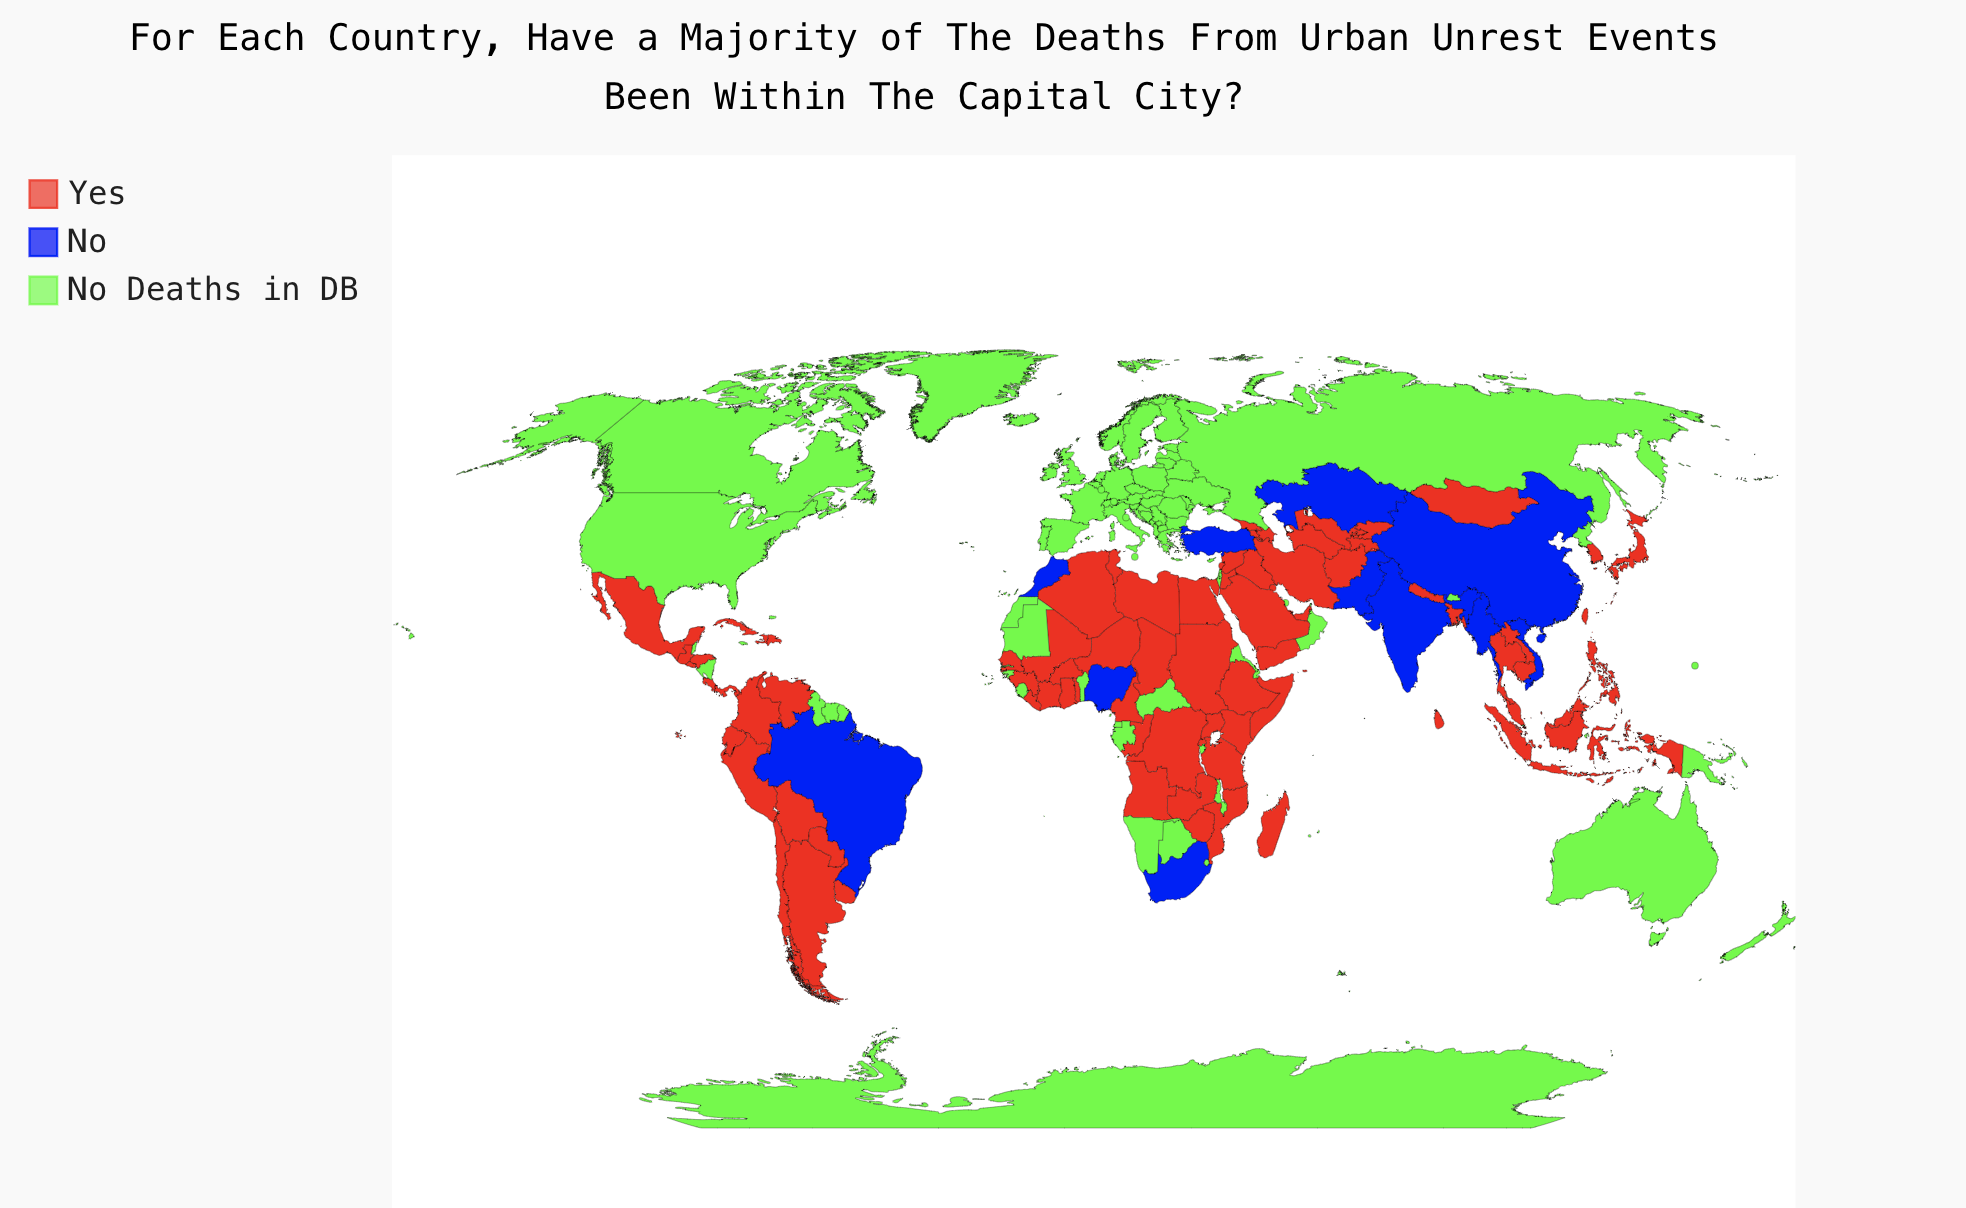

In [13]:
from IPython.display import Image
Image(filename='Capitals.png')